# Clustering  and Dimensionality Reduction

## Create example data for KMeans clustering from scratch
First, let's create some example data with 4 clusters using make_blobs.

We set random_state=1 so we all get the same clusters.

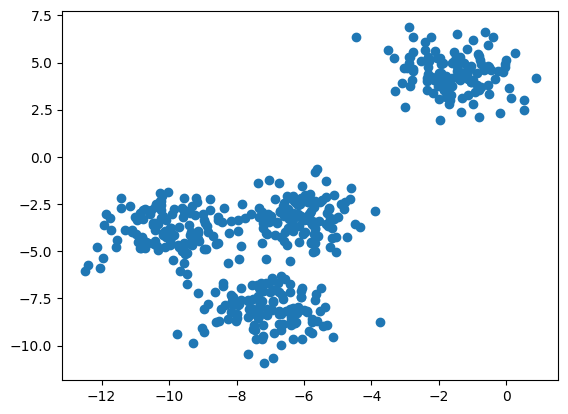

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
d1 = X[:,0] # first dimension
d2 = X[:,1] # second dimension
plt.scatter(d1,d2)
plt.show()

## We now write a function that initializes k centroids by randomly selecting them from the data points

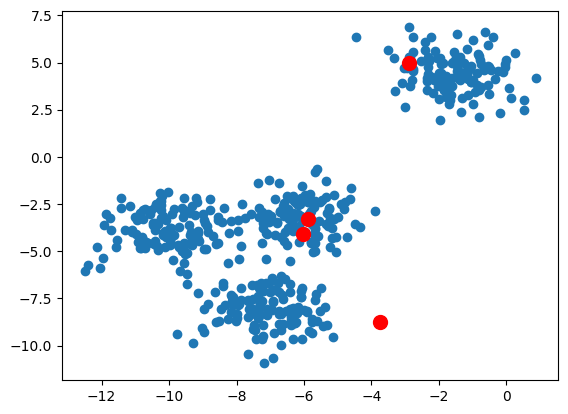

In [2]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

k = 4

centroids = initialize_centroids(X, k)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

# We now write a function that initializes k centroids following kmeans++ approach

**Description from [Wikipedia](https://en.wikipedia.org/wiki/K-means%2B%2B):** `k-means++` is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. The intuition behind this approach is that spreading out the k initial cluster centers is a good thing: the first cluster center is chosen uniformly at random from the data points that are being clustered, after which each subsequent cluster center is chosen from the remaining data points with probability proportional to its squared distance from the point's closest existing cluster center.

The exact algorithm is as follows:

1. Choose one center uniformly at random among the data points.
2. For each data point x not chosen yet, compute $D(x)$, the distance between $x$ and the nearest center that has already been chosen.
3. Choose one new data point at random as a new center, using a weighted probability distribution where a point $x$ is chosen with probability proportional to $D(x)^2$.
4. Repeat Steps 2 and 3 until k centers have been chosen.
5. Now that the initial centers have been chosen, proceed using standard k-means clustering.

[[-11.42426792  -2.1853886 ]
 [ -6.45785776  -3.30981436]
 [ -0.04261031   4.90923075]
 [ -7.54246304  -8.12722811]]


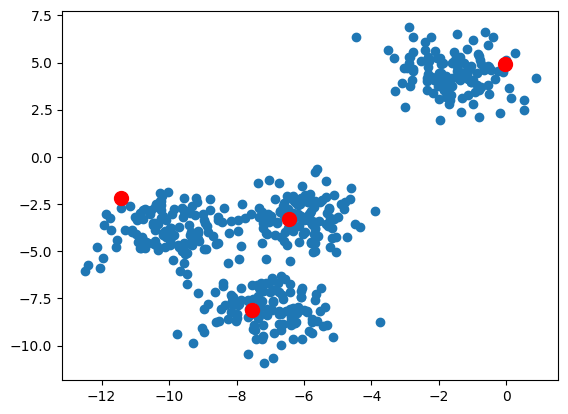

In [3]:
import scipy 

def initialize_centroids_plus_plus(X, K):
    """
    Kmeans++: the smarter way of initializing the centroids
    Args:
    X: data
    K: number of clusters
    """

    # Initialise the first centroid (randomly selected).
    i0 = np.random.choice(len(X))
    C = [X[i0]]
    indexes = [i0]

    # For the remaining centroids, we need to calculate the distance of each point to the nearest centroid,
    # and use these distances to calculate the probability of each point being the next centroid.
    # Select the next centroid randomly using these probabilities, ensuring that points further 
    # from existing centroids are more likely to be picked.
    for k in range(1, K):
        
        # Compute the squared distance from each point to the nearest centroid
        D2 = np.array([min([np.inner(c-x,c-x) for c in C]) for x in X])
        
        # Convert these distances to probabilities
        probs = D2/D2.sum()
        cumprobs = probs.cumsum()

        # Select the next centroid randomly using these probabilities
        r = np.random.rand()
        for j,p in enumerate(cumprobs):
            if r < p:
                i = j
                break
        
        # Add the selected centroid to the list
        C.append(X[i])
        indexes.append(i)

    return indexes

k = 4
indexes = initialize_centroids_plus_plus(X, k)
centroids = X[indexes]
print(centroids)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

## Now let's define a function that returns the closest centroid for each point. 

In [5]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

## We can test the code like so:

In [6]:
c = initialize_centroids(X, k)
# find the closest centroid for each data point
closest_centroid(X, c)

array([2, 2, 1, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 3, 1, 1,
       0, 3, 3, 0, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 3, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 3, 3, 3, 1, 0, 3, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 0, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       1, 1, 3, 2, 1, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1,
       3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 1, 2, 2, 1, 3, 1, 3, 2, 2, 3, 3, 1,
       1, 1, 1, 2, 3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 3, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 2, 1, 3, 2, 3, 1,
       1, 1, 1, 2, 3, 1, 3, 2, 2, 1, 3, 2, 2, 0, 3, 3, 2, 2, 3, 3, 3, 2,
       2, 3, 2, 1, 3, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 3, 1, 3,
       3, 2, 1, 3, 1, 1, 1, 3, 1, 3, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 3, 1,
       2, 2, 2, 2, 0, 1, 2, 1, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 0, 3, 1, 1,
       3, 3, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 2, 3,
       3, 3, 1, 1, 1, 3, 3, 1, 0, 3, 2, 1, 2, 3, 1,

## The last step in the algorithm is to move the centroids to the mean location associated with it:

In [7]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

move_centroids(X, closest_centroid(X, c), c)

array([[-6.01535584, -4.87803986],
       [-9.97414242, -3.86818196],
       [-7.08662451, -8.13074278],
       [-3.61277592,  1.04969819]])

## We can visualize the first two steps in the following way:

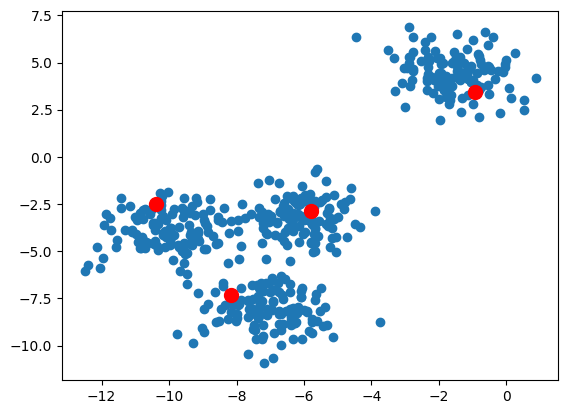

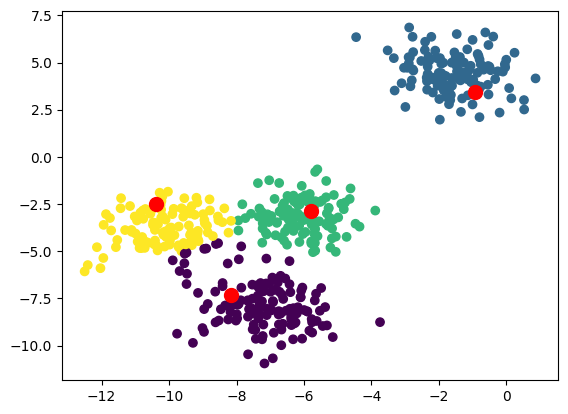

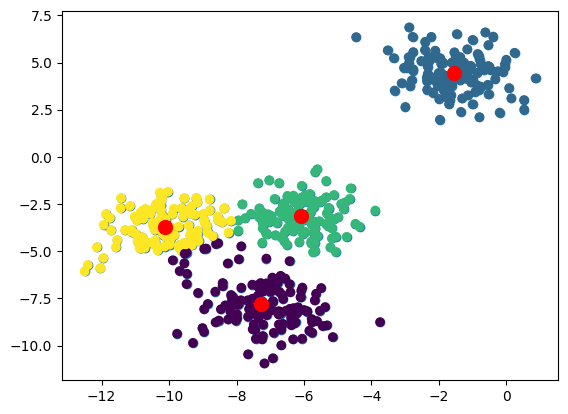

In [8]:
plt.subplot()
plt.scatter(X[:, 0], X[:, 1])
indexes = initialize_centroids_plus_plus(X, k)
centroids = X[indexes]
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

closest = closest_centroid(X, centroids)
plt.scatter(X[:, 0], X[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

plt.subplot()
plt.scatter(X[:, 0], X[:, 1])
closest = closest_centroid(X, centroids)
centroids = move_centroids(X, closest, centroids)
plt.scatter(X[:, 0], X[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

## Now let's define a function that returns the distance between two vectors

In [9]:
# Euclidean Distance Caculator
def dist(a, b):
    return np.sqrt(((a - b)**2).sum())

## The complete algorithm

Error:  16.14854876793547
Error:  2.007179241599085
Error:  0.20433714791928054
Error:  0.022898897243566526
Error:  0.0


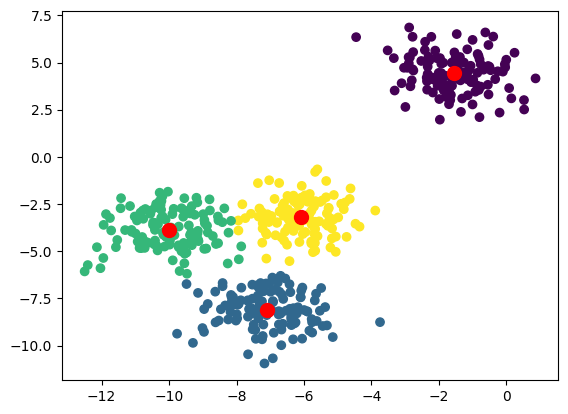

In [11]:
k = 4
indexes = initialize_centroids_plus_plus(X, k)
centroids = X[indexes]
# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

error = dist(centroids, centroids_old)
print("Error: ",error)


# Loop will run till the error becomes zero
while error != 0:
    # Storing the old centroid values
    centroids_old = centroids
    # Assigning each value to its closest cluster
    closest = closest_centroid(X, centroids)
    # Finding the new centroids by taking the average value
    centroids = move_centroids(X, closest, centroids)
    # update the error
    error = dist(centroids, centroids_old)  
    print("Error: ", error)

plt.scatter(X[:, 0], X[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

## KMeans using sklearn


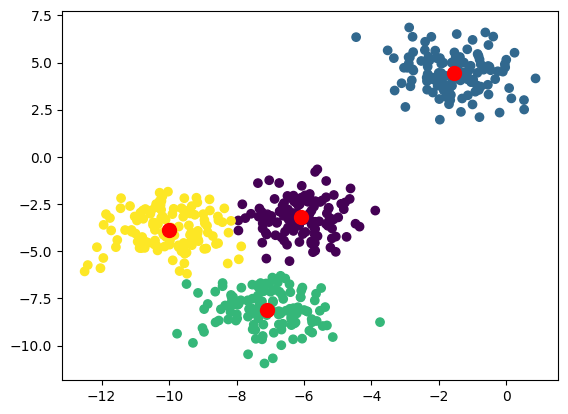

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
from collections import Counter

estimator = KMeans(init='k-means++', n_clusters=4, n_init=10)
estimator.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=estimator.labels_)
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], c='r', s=100)
plt.show()

## EXERCISE: Clustering with k-means

[Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#example-cluster-plot-kmeans-digits-py]

### Loading handwritten digits data

We'll work with the handwritten digits dataset, a classic machine-learning dataset used to explore automatic recognition of handwritten digits (i.e., 0, 1, 2, ..., 9).

For more information:
* http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
* http://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset

The digits data comprises 1797 64-dimensional representations of handwritten digits:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

It also includes labels:
[0 1 2 ... 8 9 8]

And it includes the original 8x8 image representation:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Let's look at a few images:



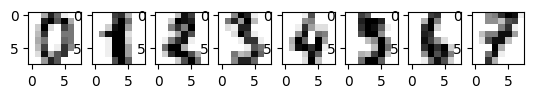

In [13]:
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

print('The digits data comprises {} {}-dimensional representations of handwritten digits:\n{}\n'.format(
        digits.data.shape[0],
        digits.data.shape[1],
        digits.data
    ))

print('It also includes labels:\n{}\n'.format(digits.target))

print('And it includes the original 8x8 image representation:\n{}\n'.format(digits.images[0]))

print('Let\'s look at a few images:\n')
NUM_SUBPLOT_ROWS = 1
NUM_SUBPLOT_COLS = 8
for i in range(NUM_SUBPLOT_ROWS*NUM_SUBPLOT_COLS):
    _ = plt.subplot(NUM_SUBPLOT_ROWS,NUM_SUBPLOT_COLS,i+1)
    _ = plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

### Clustering handwritten digits

That's the data. Now let's try clustering these 64d vectors.

`scikit-learn` implements many differnt machine learning algorithms.

The normal pattern is to:
1. intialise an estimator (e.g., `estimator = KMeans()`)
1. fit to the training data (e.g., `estimator.fit(training_data)`)
1. label the test data (e.g., `estimator.predict(test_data)`)

For clustering, we don't have separate training and test data.

So the labelling is created when we fit and accessed by `estimator.labels_`.

`estimator.inertia_` gives the sum of squared errors (SSE).

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
from collections import Counter

# First let's scale the digits data (center to mean and scale to unit variance)
data = scale(digits.data)
print('Scaled digits data:\n{}\n'.format(data))

# Let's grab the data we'll need
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target)) # classes
labels = digits.target
freq = (Counter(labels))
print ('Label counts for each digit:',sorted(freq.items()))

# And let's run k-means, specifying initialisation (k-means++), k (n_digits),
# and the number of runs (10)
estimator = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
estimator.fit(data)
print('Sum of squared errors:', estimator.inertia_)
print('Clusters from k-means:', estimator.labels_[:10])
print('Gold standard classes:', labels[:10])

y_actu = pd.Series(labels, name='Actual')
y_pred = pd.Series(estimator.labels_, name='Predicted')
confusion = pd.crosstab(y_actu, y_pred)
print(confusion)

Scaled digits data:
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]

Label counts for each digit: [(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)]
Sum of squared errors: 69404.00162808344
Clusters from k-means: [0 2 2 3 8 3 7 6 3 3]
Gold standard classes: [0 1 2 3 4 5 6 7 8 9]
Predicted    0   1   2    3   4   5    6    7    8   9
Actual                                                
0          177   0   0    0   0   0    0    0    1   0
1            0   0  97    0  58   0    0    0    0  27
2          

In [15]:
print('Clusters from k-means:', estimator.cluster_centers_)

Clusters from k-means: [[ 0.00000000e+00 -3.10238752e-01 -2.06177764e-01  3.03168840e-01
  -1.40191740e-01 -5.03966912e-01 -3.99585759e-01 -1.25022923e-01
  -5.90775571e-02 -3.46211086e-01  4.17672645e-01  3.49905412e-01
   2.38843406e-01  5.24264003e-01 -2.45478180e-01 -1.30433381e-01
  -4.46250733e-02  3.20429312e-01  7.71457454e-01 -2.98969956e-01
  -8.06601146e-01  6.93198664e-01  5.32051362e-01 -1.14221844e-01
  -3.33797263e-02  9.07972853e-01  5.85143100e-01 -1.15219864e+00
  -1.57661191e+00  2.57254863e-01  1.12870850e+00 -4.72323823e-02
   0.00000000e+00  1.02784152e+00  6.15056355e-01 -1.30867433e+00
  -1.73098189e+00  5.32680477e-03  1.20443628e+00  0.00000000e+00
  -6.13436689e-02  6.54131511e-01  9.81663232e-01 -8.72074591e-01
  -9.95308509e-01  5.43552357e-01  5.58944660e-01 -8.87416172e-02
  -3.54332626e-02  5.98517672e-02  9.90363911e-01  7.42005066e-02
   1.70542961e-01  7.50982414e-01 -2.66237735e-01 -2.09785127e-01
  -2.35964589e-02 -2.93066651e-01 -2.70076231e-01  3.

### TODO Try different initialisations

Initialisation has a large effect on cluster output. Let's try a few options.

* Initialise with random (`init='random'`)
* Run PCA with k components (`pca = PCA(n_components=n_digits).fit(data)`)
* Use PCA components to initialise (`init=pca.components_`)
* Can we determine which approach is best?

In [20]:
from sklearn.decomposition import PCA
init='random'
pca = PCA(n_components=n_digits).fit(data)
init = pca.components_

## EXERCISE: Evaluating clustering

Since we have a gold-standard labels, we can compare our system clustering to the true partition.

`scikit-learn` includes various metrics for this:
* Homogeneity
* Completeness
* V-measure
* Adjusted Rand index (ARI)
* Adjusted mutual information (AMI)
* Silhouette coefficient

For more information:
* http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Let's compare the above clusterings using V-measure.

In [21]:
from sklearn import metrics
print('k-means++ initialisation:', metrics.v_measure_score(labels, estimator.labels_))

k-means++ initialisation: 0.628222820548639


### Comparing initialisations

Let's be a bit more exhastive, comparing initialisations using variuos evaluation metrics.

In [22]:
from time import time
from sklearn.decomposition import PCA

sample_size = 300

def bench_k_means(estimator, name, data):
    "Calculate various metrics for comparing system clustering to a gold partition"
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

# print table header
print(75 * '_')
print('init         time  inertia    homo   compl  v-meas     ARI     AMI silhouet')
print(75 * '_')

# benchmark k-means++ initialisation
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

# benchmark random initialisation
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# benchmark PCA initalisation
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=10),
              name="PCA-based",
              data=data)

print(75 * '_')

___________________________________________________________________________
init         time  inertia    homo   compl  v-meas     ARI     AMI silhouet
___________________________________________________________________________
k-means++   0.54s    69509   0.615   0.661   0.637   0.483   0.634    0.152
   random   0.25s    69515   0.609   0.657   0.632   0.478   0.628    0.140
PCA-based   0.06s    70804   0.672   0.698   0.685   0.562   0.681    0.143
___________________________________________________________________________


/Users/milton/anaconda3/envs/Statistics/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1431: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


### TODO Reading evaluation output

- Which approach performs best? How would you order the other two?
- Do you neighbours get the same result?
- Can we apply statistical significance testing?
- How else can we test reliability?

In [ ]:
# TODO: replace the content of this cell with your answers (no code required)
raise NotImplementedError

## EXERCISE: Choosing k

### Create example data for choosing k

First, let's create some example data with 4 clusters using make_blobs.

We set `random_state=1` so we all get the same clusters.

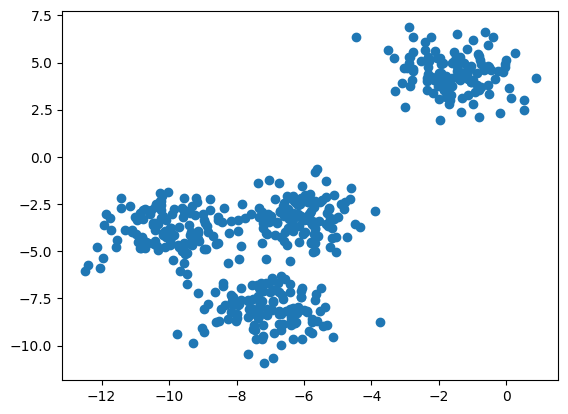

In [25]:
from sklearn.datasets import make_blobs

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
d1 = X[:,0] # first dimension
d2 = X[:,1] # second dimension
_ = plt.scatter(d1,d2)

### Choosing k using silhouette analysis

[Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html]

For good clusterings:
* the average silhouette should be close to 1 indicating that points are far away from neighbouring clusters 
* all cluster silhouettes should be close to the average silhouette score

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


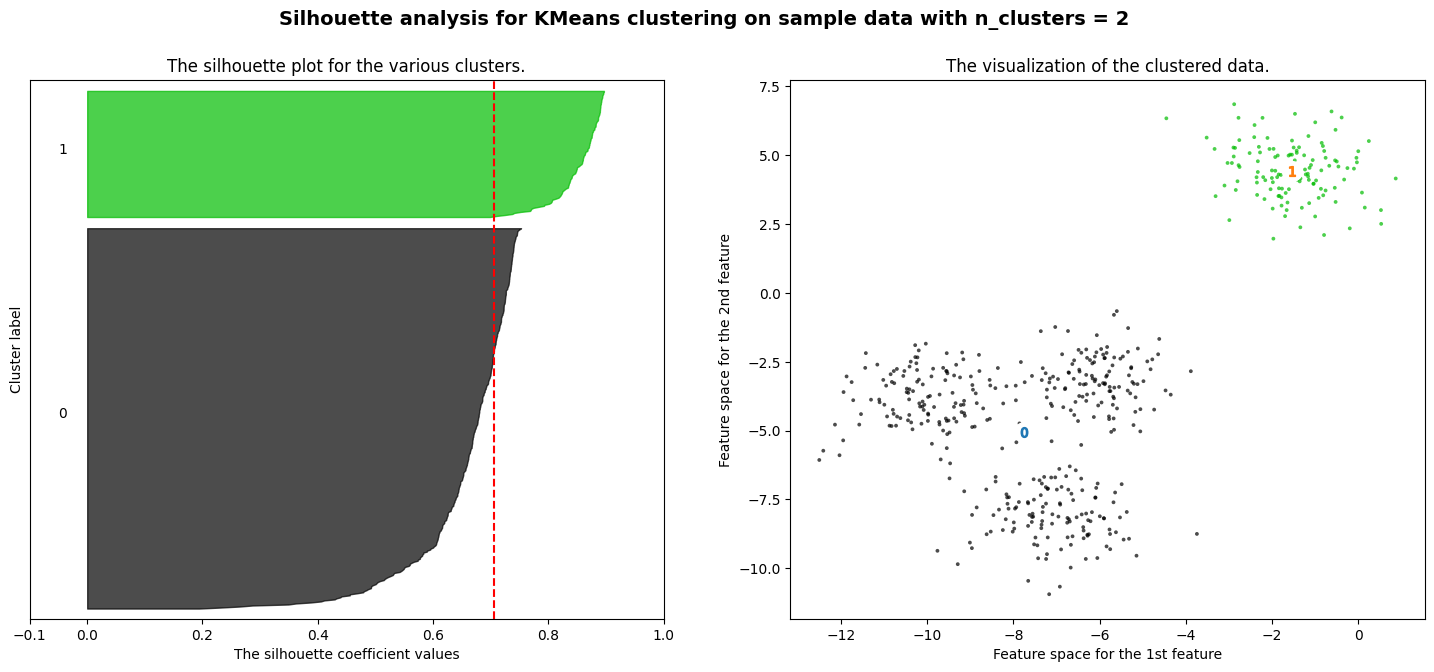

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


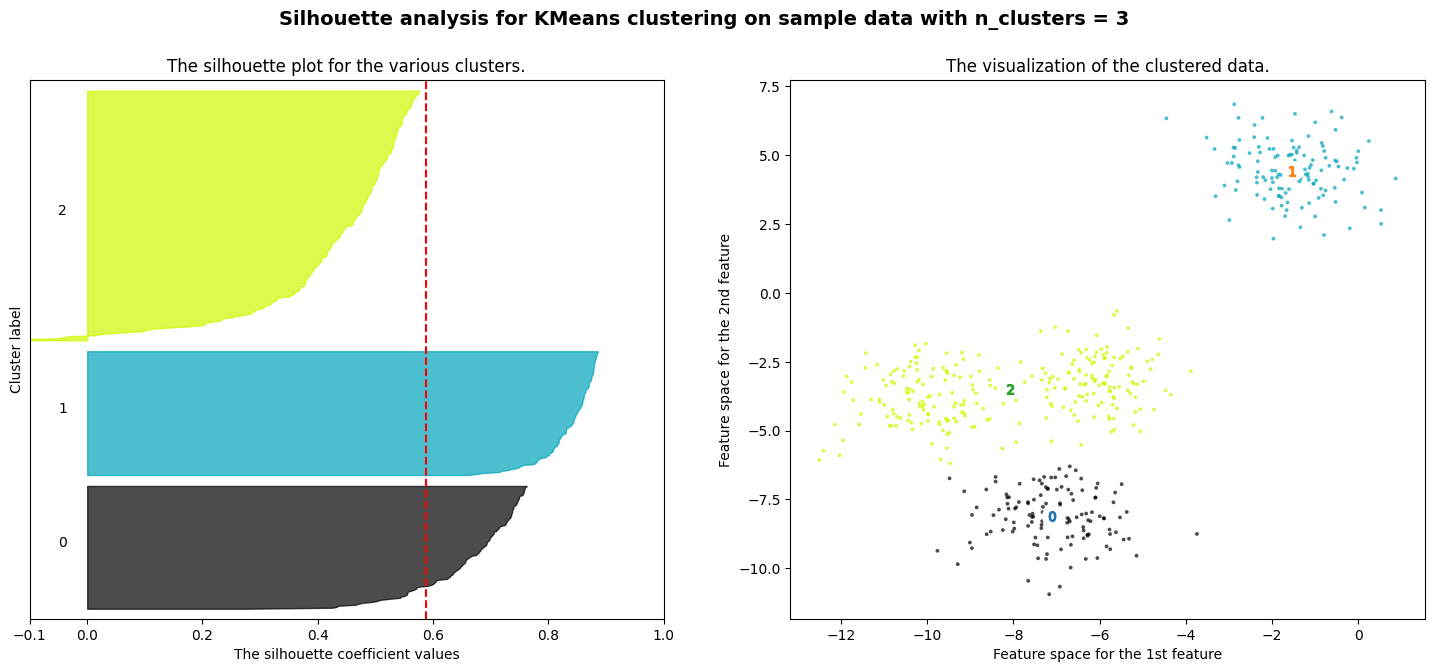

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


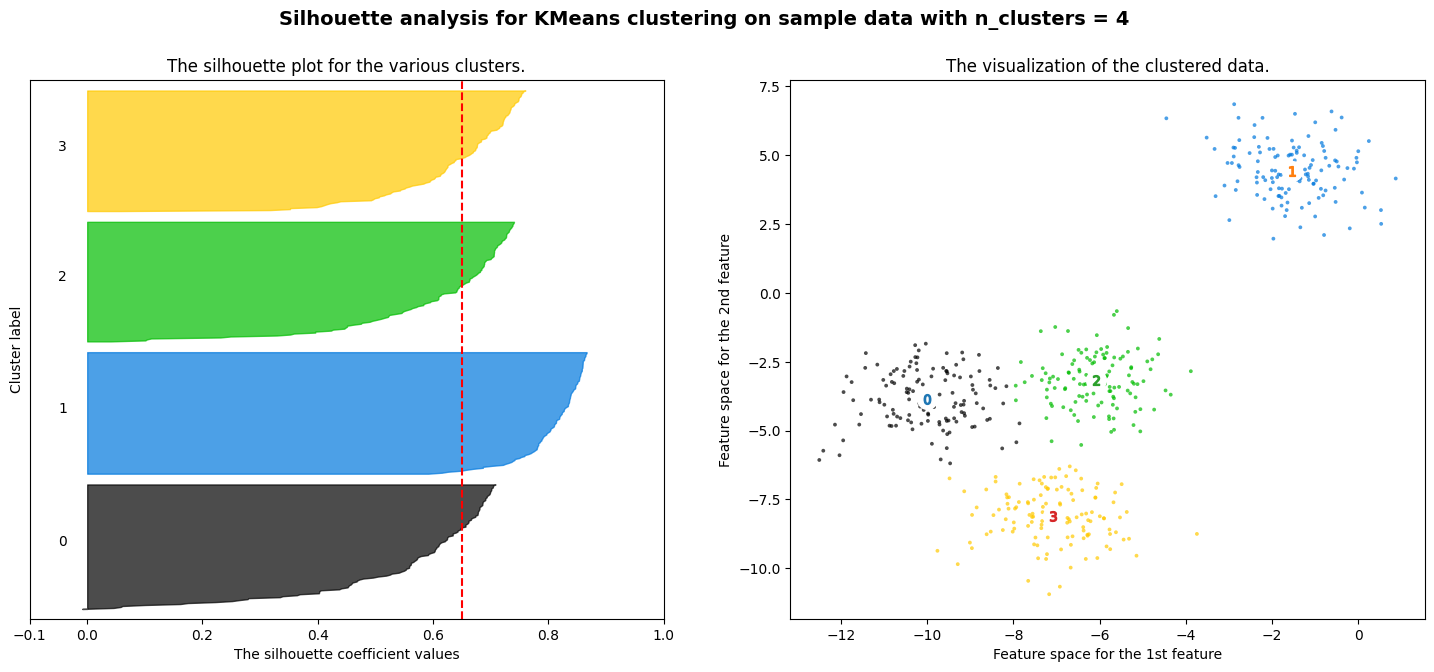

For n_clusters = 5 The average silhouette_score is : 0.561464362648773


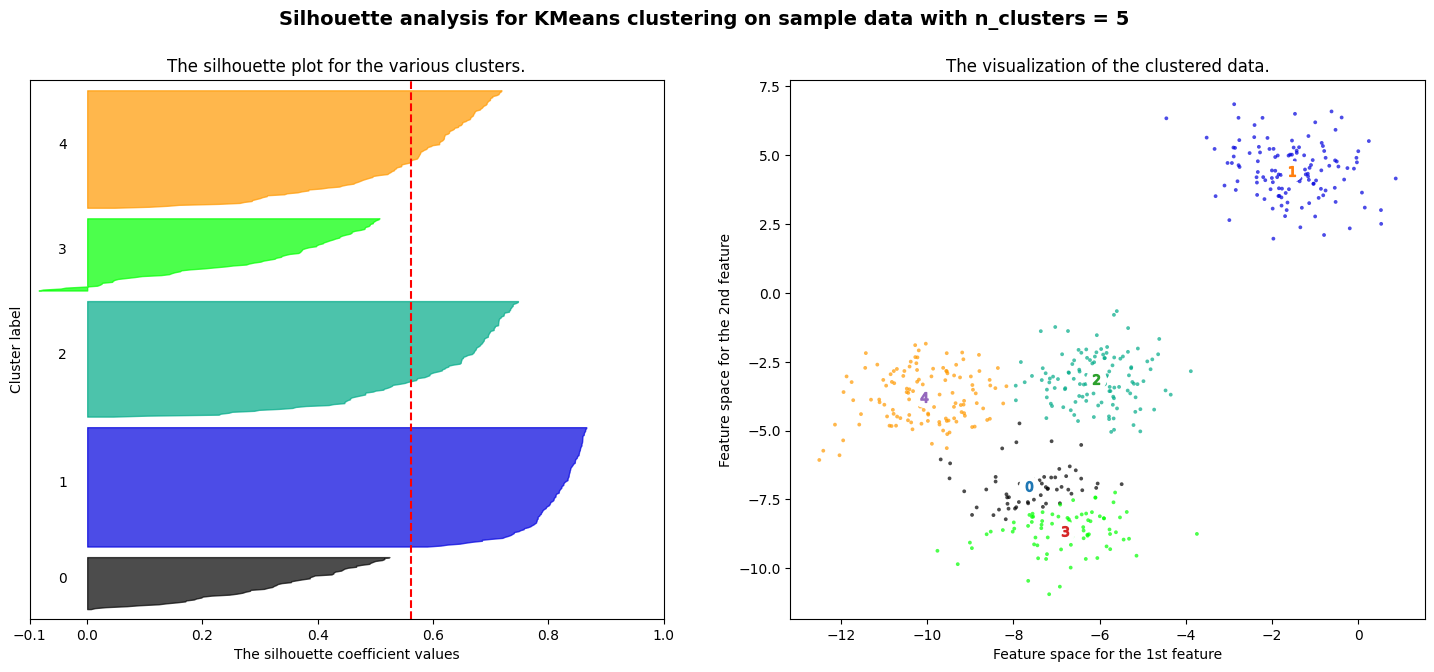

In [24]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

import matplotlib.cm as cm
range_n_clusters = range(2,6)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### TODO Choosing k

[Derived from Data Science from Scratch, Chapter 19]

- Plot inertia against k for k from 2 to 6
- What k would you choose for each? Is it the same?
- Does this work on the handwritten digits code? Why / why not?

In [ ]:
# TODO: replace the content of this cell with your Python solution
raise NotImplementedError

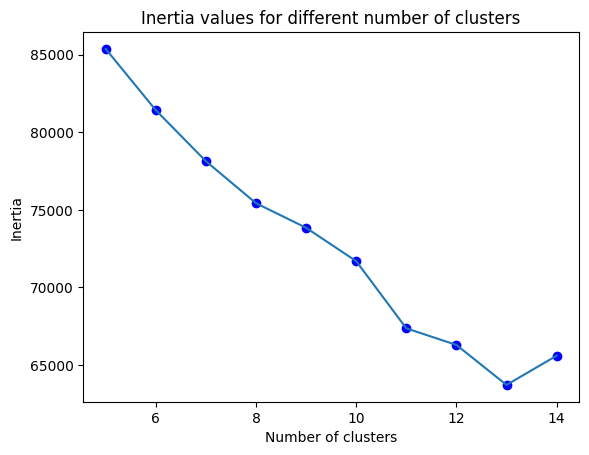

In [28]:
# 3 - Nope. The handwritten digits data is difficult to cluster.
#     However, we haven't done anything clever with our feature representation.
#     We might do better, e.g., with spectral clustering
#     (http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering).
#     Q: Does spectral clustering outperform 
#     We leave this as an extra exercise for the keen reader.
import seaborn as sns

range_n_clusters = range(5,15)
inertia_values = [KMeans(n_clusters=k).fit(data).inertia_ for k in range_n_clusters]
_ = sns.lineplot(x=range_n_clusters, y=inertia_values)
# Add points to the plot
_ = plt.scatter(range_n_clusters, inertia_values, color='blue')
_ = plt.xlabel('Number of clusters')
_ = plt.ylabel('Inertia')
_ = plt.title('Inertia values for different number of clusters')
plt.show()
# _ = plt.plot(range_n_clusters, inertia_values)

# EXERCISE: Dimensionality Reduction

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import scale

## Principal component analysis (PCA)

In [30]:
iris = datasets.load_iris()

print('The iris data comprises {} {}-dimensional representations of Iris flower.'.format(
        iris.data.shape[0],
        iris.data.shape[1]
    ))

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

The iris data comprises 150 4-dimensional representations of Iris flower.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df_iris = pd.DataFrame(data= np.c_[iris ['data'], iris ['target']],
                     columns= iris ['feature_names'] + ['target'])

df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [32]:
# Let's grab the data we'll need
n_classes = len(np.unique(iris.target_names)) # classes
print("Number of classes = ",n_classes)
labels = iris.target

Number of classes =  3


In [33]:
# Show class labels
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's see how the data looks like:



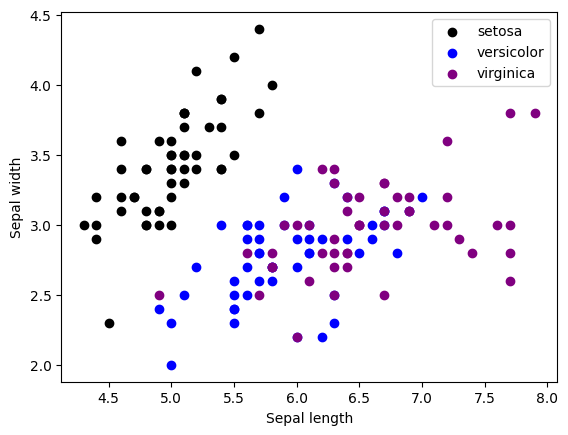

In [34]:
#['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#Plot the initial training points using sepal length vs sepal width

# Plot the training points
def plot_scatter(X,y,labels,colors):
    for i in range(len(colors)):
        px = X[:, 0][y == i]
        py = X[:, 1][y == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(labels)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

print('Let\'s see how the data looks like:\n')
colors = ['black', 'blue', 'purple']   

plot_scatter(iris.data, iris.target,iris.target_names, colors)

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.73  0.959 0.996 1.001]


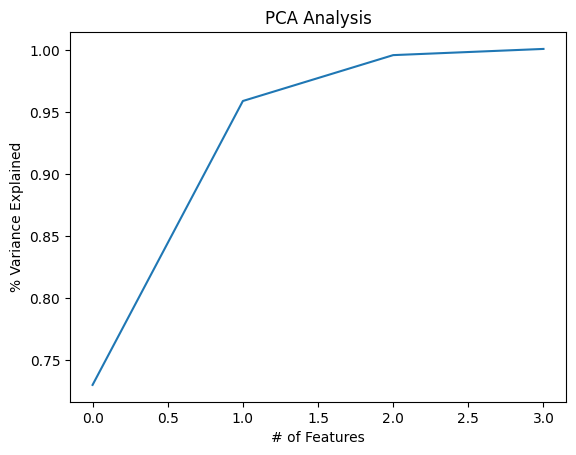

1.0

In [35]:
# let's apply PCA on the data and reduce its dimensionality
pca = PCA()
data = scale(iris.data)
iris_pca = pca.fit_transform(data)
#Explained variance ratio
print(pca.explained_variance_ratio_)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()
#Cumulative variance
pca.explained_variance_ratio_.sum()

### Deciding how many componenets
The output of the explained varinace shows  that the first component explains 72.8%  of the data set's variation. That means it holds 72.8% of the data's information in one principal component. And by taking the first two components, we only exlude 4.2% of the data set's information and the first two components  contain 95.8% of the iris data set's original information.


In [36]:
pca = PCA(n_components=2)
data = scale(iris.data)
iris_pca = pca.fit_transform(data)
comps = pd.DataFrame(data = iris_pca, columns = ['pc 1', 'pc 2'])
comps[1:5]

final_comps = pd.concat([comps, pd.DataFrame(data=labels,columns=['target'])], axis = 1)
final_comps[1:5]
#print top five records
final_comps.iloc[1:5,:]

,pc 1,pc 2,target
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [37]:
# Plot the training points
def plot_pca_scatter(X,y,labels,colors):
    for i in range(len(colors)):
        px = X[:, 0][y == i]
        py = X[:, 1][y == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(labels)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

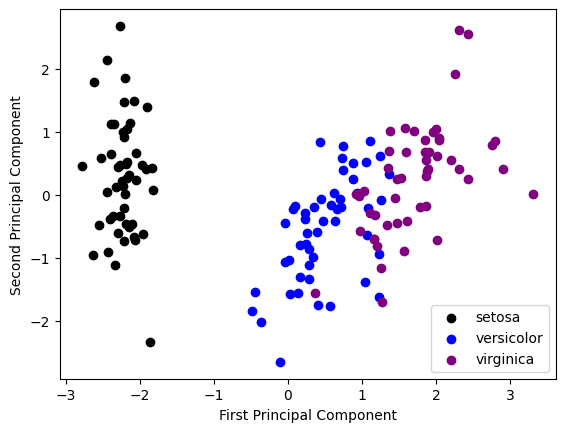

In [38]:
# Plot the training points after PCA
colors = ['black', 'blue', 'purple']  
plot_pca_scatter(iris_pca, iris.target,iris.target_names, colors)

### TODO PCA on digits dataset
* Load digits dataset 
* Scale the data
* Apply PCA
* What would be a reasonable number of components for digits  data?

In [ ]:
# TODO: replace the content of this cell with your Python solution
raise NotImplementedError